In [1]:
#!pip install halotools

In [2]:
import numpy as np
import pandas as pd
from halotools.mock_observables import angular_tpcf
from matplotlib import pyplot as plt
from astroML.correlation import uniform_sphere

In [3]:
np.random.seed(9876789)

In [4]:
# Import LSB candidates
data_LSB = pd.read_csv('Catalogo_final_deteccion.txt', delim_whitespace=True)

In [5]:
# Group of galaxies distributed by redshift peaks
p1 = pd.read_csv('Objetos_0.003_0.008.txt', delim_whitespace=True)
p2 = pd.read_csv('Objetos_0.008_0.020.txt', delim_whitespace=True)
p3 = pd.read_csv('Objetos_0.020_0.025.txt', delim_whitespace=True)
p4 = pd.read_csv('Objetos_0.025_0.035.txt', delim_whitespace=True)

p1.columns = [ 'RA', 'DEC', 'z' ]
p2.columns = [ 'RA', 'DEC', 'z' ]
p3.columns = [ 'RA', 'DEC', 'z' ]
p4.columns = [ 'RA', 'DEC', 'z' ]

In [6]:
ra_lsb = np.asarray( data_LSB['RA'] )
ra1 = np.asarray( p1['RA'] )
ra2 = np.asarray( p2['RA'] )
ra3 = np.asarray( p3['RA'] )
ra4 = np.asarray( p4['RA'] )

dec_lsb = np.asarray( data_LSB['DEC'] )
dec1 = np.asarray( p1['DEC'] )
dec2 = np.asarray( p2['DEC'] )
dec3 = np.asarray( p3['DEC'] )
dec4 = np.asarray( p4['DEC'] )

In [7]:
def error_tpacc(data1, data2, bins, Nbootstraps=10, Nran=10000):
    """  Bootstrap sampling for error estimation of the 
    two-point angular cross-correlation function    
    Landy-Szalay method is used for cross-correlation. """
    
    ra1 = data1[:,0]
    ra2 = data2[:,0]    
    dec1 = data1[:,1]
    dec2 = data2[:,1]
    
    ra = np.concatenate((ra1, ra2))
    dec = np.concatenate((dec1, dec2))

    bootstraps = []

    for i in range(Nbootstraps):
        # draw a random sample with N points
        ra_R, dec_R = uniform_sphere((min(ra), max(ra)), (min(dec), max(dec)), Nran)
        ran = np.vstack((ra_R, dec_R)).T

        if i > 0:
            # random sample of the data
            ind1 = np.random.randint(0, data1.shape[0], data1.shape[0])
            data1_b = data1[ind1]
            ind2 = np.random.randint(0, data2.shape[0], data2.shape[0])
            data2_b = data2[ind2]
        else:
            data1_b = data1
            data2_b = data2

        bootstraps.append( angular_tpcf(data1_b, bins, sample2=data2_b, num_threads='max',
                                       do_auto=False, do_cross=True, randoms=ran,
                                       estimator='Landy-Szalay') )

    est_err = np.std(bootstraps, 0, ddof=1)

    return est_err, bootstraps

Used bins correspond to angular distances in degrees. We have found the values for the first (min) and last (max) bin through trial and error.

In [8]:
# Number of bins to use for the calculation of the correlation function Nbins-1
Nbins = 11 # actual number of bins will be Nbins - 1

# Number of randoms
Nran = 10000

# Bins for field objects
min_theta = 0.05
max_theta = 10.
bins = 10 ** np.linspace(np.log10( min_theta ), np.log10( max_theta ), Nbins)

# Angular coordinates
angular_coords_lsb = np.vstack((ra_lsb, dec_lsb)).T
angular_coords1 = np.vstack((ra1, dec1)).T

ra = np.concatenate((ra_lsb, ra1))
dec = np.concatenate((dec_lsb, dec1))
ra_R, dec_R = uniform_sphere((min(ra), max(ra)), (min(dec), max(dec)), Nran)
angular_ran = np.vstack((ra_R, dec_R)).T

w_thetal1 = angular_tpcf(angular_coords_lsb, bins, sample2=angular_coords1, num_threads='max',
                        do_auto=False, do_cross=True, randoms=angular_ran, estimator='Landy-Szalay')

ew1, boo1 = error_tpacc(angular_coords_lsb, angular_coords1, bins, Nbootstraps=50)

angular_coords2 = np.vstack((ra2, dec2)).T

ra = np.concatenate((ra_lsb, ra2))
dec = np.concatenate((dec_lsb, dec2))
ra_R, dec_R = uniform_sphere((min(ra), max(ra)), (min(dec), max(dec)), Nran)
angular_ran = np.vstack((ra_R, dec_R)).T

w_thetal2 = angular_tpcf(angular_coords_lsb, bins, sample2=angular_coords2, num_threads='max', 
                         do_auto=False, do_cross=True, randoms=angular_ran, estimator='Landy-Szalay')

ew2, boo2 = error_tpacc(angular_coords_lsb, angular_coords2, bins, Nbootstraps=50)

angular_coords3 = np.vstack((ra3, dec3)).T 

ra = np.concatenate((ra_lsb, ra3))
dec = np.concatenate((dec_lsb, dec3))
ra_R, dec_R = uniform_sphere((min(ra), max(ra)), (min(dec), max(dec)), Nran)
angular_ran = np.vstack((ra_R, dec_R)).T

w_thetal3 = angular_tpcf(angular_coords_lsb, bins, sample2=angular_coords3, num_threads='max', 
                         do_auto=False, do_cross=True, randoms=angular_ran, estimator='Landy-Szalay')

ew3, boo3 = error_tpacc(angular_coords_lsb, angular_coords3, bins, Nbootstraps=50)

angular_coords4 = np.vstack((ra4, dec4)).T

ra = np.concatenate((ra_lsb, ra4))
dec = np.concatenate((dec_lsb, dec4))
ra_R, dec_R = uniform_sphere((min(ra), max(ra)), (min(dec), max(dec)), Nran)
angular_ran = np.vstack((ra_R, dec_R)).T

w_thetal4 = angular_tpcf(angular_coords_lsb, bins, sample2=angular_coords4, num_threads='max', 
                         do_auto=False, do_cross=True, randoms=angular_ran, estimator='Landy-Szalay')

ew4, boo4 = error_tpacc(angular_coords_lsb, angular_coords4, bins, Nbootstraps=50)


In [9]:
bin_centers = 0.5 * (bins[1:] + bins[:-1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


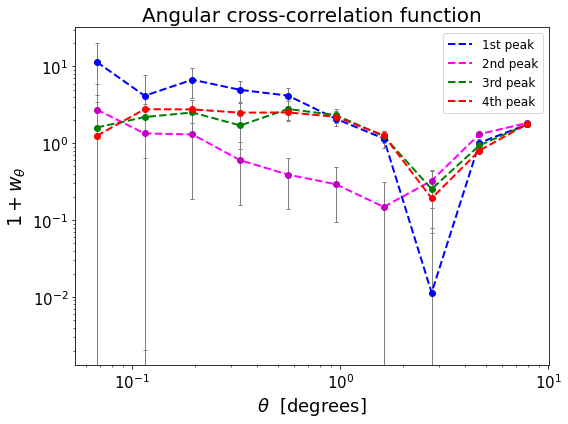

In [11]:
# Default font size
fs = 20

plt.figure(figsize=(8, 6))

plt.plot(bin_centers,1.0+w_thetal1,'--', color='blue',
         label = '1st peak', linewidth=2)
plt.errorbar(bin_centers,1.0+w_thetal1, ew1,
                fmt='ob', ecolor='gray', lw=1, capsize=2)
plt.plot(bin_centers,1.0+w_thetal2,'--', color='magenta',
         label = '2nd peak', linewidth=2)
plt.errorbar(bin_centers,1.0+w_thetal2, ew2,
                fmt='om', ecolor='gray', lw=1, capsize=2)
plt.plot(bin_centers,1.0+w_thetal3,'--', color='green',
         label = '3rd peak', linewidth=2)
plt.errorbar(bin_centers,1.0+w_thetal3, ew3,
                fmt='og', ecolor='gray', lw=1, capsize=2)
plt.plot(bin_centers,1.0+w_thetal4,'--', color='red',
         label = '4th peak', linewidth=2)
plt.errorbar(bin_centers,1.0+w_thetal4, ew4,
                fmt='or', ecolor='gray', lw=1, capsize=2)

plt.loglog()

plt.ylabel(r'$1+w_{\theta}$', fontsize=fs-1)
plt.xlabel(r'$\theta$  $[{\rm degrees}]$', fontsize=fs-2)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Angular cross-correlation function', fontsize=fs)
plt.legend(loc='best', fontsize=fs-8)
plt.tight_layout()

plt.savefig('2p_angular_corr_halo.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


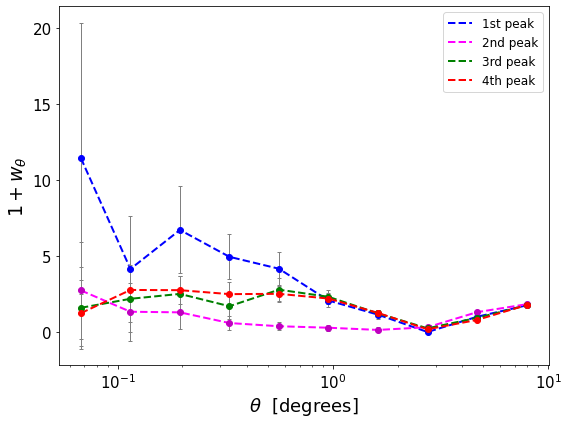

In [12]:
plt.figure(figsize=(8, 6))

plt.plot(bin_centers,1.0+w_thetal1,'--', color='blue',
         label = '1st peak', linewidth=2)
plt.errorbar(bin_centers,1.0+w_thetal1, ew1,
                fmt='ob', ecolor='gray', lw=1, capsize=2)
plt.plot(bin_centers,1.0+w_thetal2,'--', color='magenta',
         label = '2nd peak', linewidth=2)
plt.errorbar(bin_centers,1.0+w_thetal2, ew2,
                fmt='om', ecolor='gray', lw=1, capsize=2)
plt.plot(bin_centers,1.0+w_thetal3,'--', color='green',
         label = '3rd peak', linewidth=2)
plt.errorbar(bin_centers,1.0+w_thetal3, ew3,
                fmt='og', ecolor='gray', lw=1, capsize=2)
plt.plot(bin_centers,1.0+w_thetal4,'--', color='red',
         label = '4th peak', linewidth=2)
plt.errorbar(bin_centers,1.0+w_thetal4, ew4,
                fmt='or', ecolor='gray', lw=1, capsize=2)

plt.semilogx()

plt.ylabel(r'$1+w_{\theta}$', fontsize=fs-1)
plt.xlabel(r'$\theta$  $[{\rm degrees}]$', fontsize=fs-2)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(loc='best', fontsize=fs-8)
plt.tight_layout()

plt.savefig('2p_angular_corr_halo_logx.eps')